<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 07</o>: <m>(__Num 4 ML__)</m>

> <c>Advanced gradient descent algorithms</c> 
##### <m> Problem </m>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

#### <m>Creating Dataset</m>

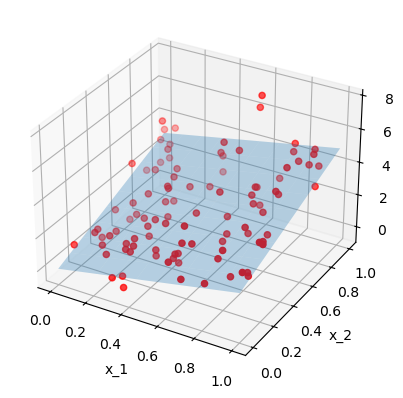

In [2]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)

tmp1,tmp2 = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))

def exact(X):
    return 2*X[:,0] + 3*X[:,1]

Z = exact(np.vstack((tmp1.ravel(),tmp2.ravel())).T).reshape((10,10))
fig = plt.figure(figsize=plt.figaspect(0.65))
ax = fig.add_subplot(projection = "3d")
ax.scatter(X[:,0],X[:,1],y,c='red')
ax.plot_surface(tmp1,tmp2,Z,alpha=0.3)
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_zlabel("y")
plt.show()

## SGD with momentum vs AdaGrad
![](./Images/Screenshot_2023-11-27-14-13-08_1920x1080.png)


### AdaGrad vs RMSprop
![](./Images/Screenshot_2023-11-27-14-11-34_1920x1080.png)


### RMSprop to Adam
![](./Images/Screenshot_2023-11-27-14-12-45_1920x1080.png)


In [3]:

def optimization_algorithm(key):
    if key == "Adam":
        return AdamOptimizer()
    elif key == "RMSprop":
        return RMSpropOptimizer()
    elif key == "AdaGrad":
        return AdaGradOptimizer()
    else:
        raise ValueError("Invalid optimization algorithm key.")

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {}
        self.v = {}
        self.t = 0

    def update(self, parameters, gradients):
        self.t += 1
        for param_key in parameters.keys():
            if param_key not in self.m:
                self.m[param_key] = np.zeros_like(parameters[param_key])
                self.v[param_key] = np.zeros_like(parameters[param_key])

            self.m[param_key] = self.beta1 * self.m[param_key] + (1 - self.beta1) * gradients[param_key]
            self.v[param_key] = self.beta2 * self.v[param_key] + (1 - self.beta2) * np.square(gradients[param_key])
            m_hat = self.m[param_key] / (1 - np.power(self.beta1, self.t))
            v_hat = self.v[param_key] / (1 - np.power(self.beta2, self.t))
            parameters[param_key] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        return parameters

class RMSpropOptimizer:
    def __init__(self, learning_rate=0.001, beta=0.9, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.beta = beta
        self.epsilon = epsilon
        self.cache = {}

    def update(self, parameters, gradients):
        for param_key in parameters.keys():
            if param_key not in self.cache:
                self.cache[param_key] = np.zeros_like(parameters[param_key])

            self.cache[param_key] = self.beta * self.cache[param_key] + (1 - self.beta) * np.square(gradients[param_key])
            parameters[param_key] -= self.learning_rate * gradients[param_key] / (np.sqrt(self.cache[param_key]) + self.epsilon)

        return parameters

class AdaGradOptimizer:
    def __init__(self, learning_rate=0.001, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.cache = {}

    def update(self, parameters, gradients):
        for param_key in parameters.keys():
            if param_key not in self.cache:
                self.cache[param_key] = np.zeros_like(parameters[param_key])

            self.cache[param_key] += np.square(gradients[param_key])
            parameters[param_key] -= self.learning_rate * gradients[param_key] / (np.sqrt(self.cache[param_key]) + self.epsilon)

        return parameters

In [4]:
parameters = {
    "weight": np.random.randn(10, 10),
    "bias": np.random.randn(10)
}
gradients = {
    "weight": np.random.randn(10, 10),
    "bias": np.random.randn(10)
}

optimizer = optimization_algorithm("AdaGrad")
updated_params = optimizer.update(parameters, gradients)

print(updated_params)

{'weight': array([[ 2.12315611,  1.03146529, -1.52036995, -0.4832341 ,  1.26591119,
        -0.70866867,  0.44281953,  0.77563404, -0.92793006, -0.06052534],
       [-3.24226733, -1.02538763, -0.25356815, -1.24678319,  1.63141132,
        -1.43114132, -0.44104448,  0.13174056,  1.44227328, -1.43486217],
       [ 1.16416375,  0.01123304, -0.98050866,  0.46110354,  0.19805972,
        -0.60121687,  0.0688021 , -0.38431361,  0.11451733,  0.66113069],
       [ 1.58701681, -1.23881549,  2.13203338, -1.95108782, -0.1507851 ,
         0.58731721,  0.28199178, -0.62369951, -0.20712226, -0.49200095],
       [-0.59036285,  0.84860231,  0.35801546, -0.69390958,  0.90059987,
         0.30829945,  0.8118622 ,  0.62862886, -0.829995  , -0.55918105],
       [ 0.7482936 ,  0.60937027, -0.02190156,  0.11832737,  1.2766649 ,
        -0.5925713 ,  0.54609739, -0.2031925 , -0.2186812 ,  1.09777686],
       [ 0.82641631,  0.81250965,  1.30447882,  0.02000385,  0.68295296,
        -0.31126674,  0.32316636, 

In [5]:
class LinearRegression:
    def __init__(self, optimizer="Adam", learning_rate=0.01, num_iterations=100):
        self.optimizer = optimization_algorithm(optimizer)
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.parameters = None

    def fit(self, X, y):
        self.parameters = self.initialize_parameters(X.shape[1])
        for iteration in range(self.num_iterations):
            gradients = self.compute_gradients(X, y)
            self.parameters = self.optimizer.update(self.parameters, gradients)

    def predict(self, X):
        if self.parameters is None:
            raise ValueError("Model has not been trained yet.")
        return np.dot(X, self.parameters["weight"]) + self.parameters["bias"]

    def initialize_parameters(self, num_features):
        parameters = {
            "weight": np.zeros(num_features),
            "bias": 0
        }
        return parameters

    def compute_gradients(self, X, y):
        num_samples = X.shape[0]
        y_pred = self.predict(X)
        gradients = {
            "weight": (1 / num_samples) * np.dot(X.T, (y_pred - y)),
            "bias": (1 / num_samples) * np.sum(y_pred - y)
        }
        return gradients

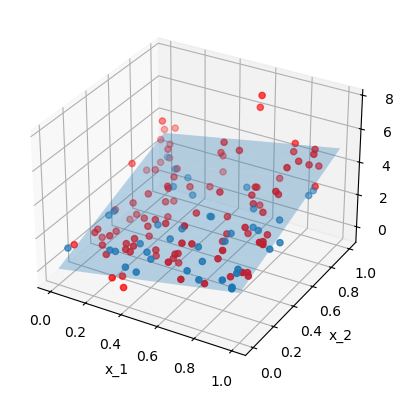

Error at max 2.307098855102843.


In [8]:
# Create a LinearRegression model with the desired optimizer
model = LinearRegression(optimizer="Adam", learning_rate=0.6, num_iterations=1000)

# Train the model
model.fit(X, y)
np.random.seed(1000)

# Make predictions
X_test = np.random.rand(40,2)
predictions = model.predict(X_test)
error = np.abs(predictions - exact(X_test))
fig = plt.figure(figsize=plt.figaspect(0.65))
ax = fig.add_subplot(projection = "3d")
ax.scatter(X_test[:,0],X_test[:,1],predictions)
ax.scatter(X[:,0],X[:,1],y,c='red')
ax.plot_surface(tmp1,tmp2,Z,alpha=0.3)
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_zlabel("y")
plt.show()
print(f"Error at max {np.max(error)}.")